## Effect of noise and height on the inversion
This study has been demonstrated in the EMagPy paper [McLachlan et al. (2021)](https://doi.org/10.1016/j.cageo.2020.104561).

All inversions are performed with the ROPE solver on a two-layer model with a varying depth. (a) Inversion with 0% noise with device on the ground. (b) Inversion with 5% noise on the ground. (c) Inversion with 0% noise at 1 m above the ground (d) Inversion with 5% noise at 1 m above the ground. The red line represents the true interface between the two layers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src') # add path where emagpy is
from emagpy import Problem

datadir = '../src/examples/'

letters = ['a','b','c','d','e','f','g','h','i','j']

In [2]:
# parameters for the synthetic model
nlayer = 2 # number of layer
npos = 20 # number of sampling positions
conds = np.ones((npos, nlayer))*[20, 100]
x = np.linspace(0.1, 2, npos)[:,None]
depths = 0.65 + 0.2 * np.sin(x*np.pi*2) # wave
coils0 = ['VCP1.48f10000h0', 'VCP2.82f10000h0', 'VCP4.49f10000h0',
          'HCP1.48f10000h0', 'HCP2.82f10000h0', 'HCP4.49f10000h0']
coils1 = ['VCP1.48f10000h1', 'VCP2.82f10000h1', 'VCP4.49f10000h1',
          'HCP1.48f10000h1', 'HCP2.82f10000h1', 'HCP4.49f10000h1']
coils = [coils0, coils0, coils1, coils1]
noises = [0, 0.05, 0, 0.05]
ks = []
# generate ECa using forward model
for i in range(4):
    k = Problem()
    k.setModels([depths], [conds])
    _ = k.forward(forwardModel='FSlin', coils=coils[i], noise=noises[i])
    ks.append(k)

# invert
for k in ks:
    k.setInit(depths0=np.array([0.5]), fixedDepths=[False])
    k.invert(forwardModel='FSlin', method='ROPE', regularization='l1',
             bnds=[(0.05, 2.5), (5, 150), (5, 150)], rep=1000, njobs=-1)

Forward modelling
Forward modelling
Forward modelling
Forward modelling


100%|██████████| 20/20 [01:13<00:00,  5.03s/it]


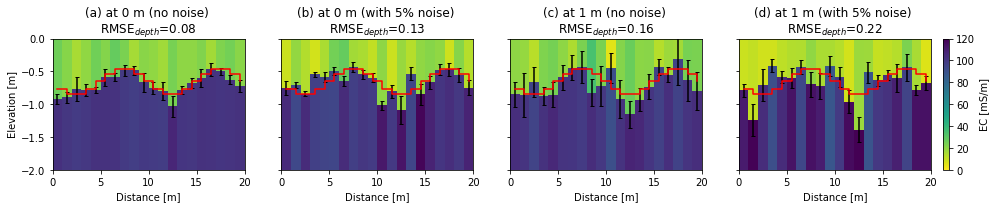

In [3]:
# graph of inverted values
titles = ['(a) at 0 m (no noise)', '(b) at 0 m (with 5% noise)',
          '(c) at 1 m (no noise)', '(d) at 1 m (with 5% noise)']
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(14,3))
for i in range(4):
    ax = axs[i]
    ks[i].showResults(ax=ax, vmin=0, vmax=120, maxDepth=2, errorbar=True)
    rmseDepths = np.sqrt(np.sum((ks[i].depths[0][:,0] - depths[:,0])**2)/len(depths[:,0]))
    ax.set_title('{:s} \nRMSE$_{{depth}}$={:.2f}'.format(titles[i], rmseDepths))
    ax.step(np.arange(depths.shape[0])+0.5, -depths, 'r', where='post') # true depth
    if i < 3:
        fig.axes[-1].remove()
    if i > 0:
        ax.set_ylabel('')

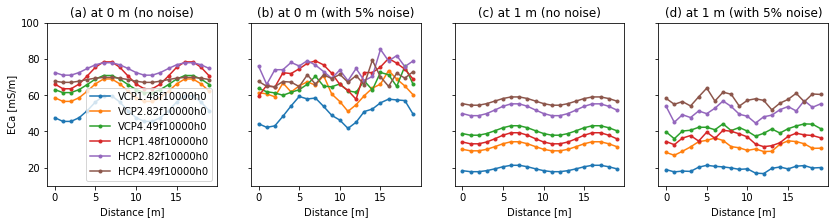

In [4]:
# graph of apparent values
titles = ['at 0 m (no noise)', 'at 0 m (with 5% noise)',
          'at 1 m (no noise)', 'at 1 m (with 5% noise)']
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(14,3))
for i in range(4):
    ax = axs[i]
    ks[i].show(ax=ax, vmin=10, vmax=100)
    ax.set_title('({:s}) {:s}'.format(letters[i], titles[i]))
    if i > 0:
        ax.get_legend().remove()
        ax.set_ylabel('')